<a href="https://colab.research.google.com/github/Tanishqa-10/Twitter-Trending-Topic-Analysis/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TWITTER TRENDING TOPIC ANALYSIS USING NLP**

# Scrapping data 

In [ ]:
!pip install -q snscrape

In [ ]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools

In [ ]:
loc = '19.0843, 72.8360,500km'
df_coord = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'geocode:"{}"'.format(loc)).get_items(), 50))[['date', 'content']]

In [ ]:
print("Data downloaded successfully")
df_coord.to_csv('twitter_data.csv')

Data downloaded successfully


# Importing required libraries :

In [ ]:
import numpy as np
import pandas as pd 
import re

import gensim
from gensim import corpora, models, similarities
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords

home = '../input/twitterrecentindia/'

# Cleaning Data

# 1] Delete unnecessary data: usernames, emails, hyperlinks, punctuation, duplicate characters, and special characters like smileys (emoji).

In [ ]:
!pip install demoji

import demoji
demoji.download_codes()


     |████████████████████████████████| 42 kB 1.0 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  after removing the cwd from sys.path.


In [ ]:
df_coord

,date,content
0,2022-04-26 06:39:46+00:00,@RohilChaturvedi We are still waiting for your...
1,2022-04-26 06:39:46+00:00,This is the most comprehensive and factual rep...
2,2022-04-26 06:39:46+00:00,@shosrnagar your work good but why are you men...
3,2022-04-26 06:39:46+00:00,@Cricketracker Ki
4,2022-04-26 06:39:46+00:00,@N_BN_Trader no
5,2022-04-26 06:39:46+00:00,"New Electric Car Coming to India, Will Launch ..."
6,2022-04-26 06:39:46+00:00,@arpiturfrnd To ensure that your Flipkart acco...
7,2022-04-26 06:39:45+00:00,@anejaraaj @Mansi94893004 @Mahanaatma1 @nishac...
8,2022-04-26 06:39:45+00:00,@Fitoor_E_Meraki Good afternoon🌹😊 Happy day 😊
9,2022-04-26 06:39:45+00:00,@DrishtiVideos Either B or D.\n' D ' in the se...


In [ ]:
df_coord.to_csv('t3_data.csv')

In [ ]:
for index, row in df_coord.iterrows():
    content = row["content"]
    content = demoji.replace(content,repl='')
    df_coord["content"][index] = content

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_coord

,date,content
0,2022-04-26 06:39:46+00:00,@RohilChaturvedi We are still waiting for your...
1,2022-04-26 06:39:46+00:00,This is the most comprehensive and factual rep...
2,2022-04-26 06:39:46+00:00,@shosrnagar your work good but why are you men...
3,2022-04-26 06:39:46+00:00,@Cricketracker Ki
4,2022-04-26 06:39:46+00:00,@N_BN_Trader no
5,2022-04-26 06:39:46+00:00,"New Electric Car Coming to India, Will Launch ..."
6,2022-04-26 06:39:46+00:00,@arpiturfrnd To ensure that your Flipkart acco...
7,2022-04-26 06:39:45+00:00,@anejaraaj @Mansi94893004 @Mahanaatma1 @nishac...
8,2022-04-26 06:39:45+00:00,@Fitoor_E_Meraki Good afternoon Happy day
9,2022-04-26 06:39:45+00:00,@DrishtiVideos Either B or D.\n' D ' in the se...


In [ ]:
!pip install demoji
import demoji
text="That is so funny 😂😂😂😉😉 "
print("Text before : ",text)
final_op = demoji.replace(text,repl='')
print("Text after : ",final_op)

Text before :  That is so funny 😂😂😂😉😉 
Text after :  That is so funny  


In [ ]:
import re
def delete_unneccessary_data(tweet):
  tweet = demoji.replace(tweet,repl='')
  tweet = re.sub(r'[^\w\s\__]', '', tweet)

  #delte username
  tweet = re.sub('@[^\s]+','',tweet)
  tweet = re.sub('username[^\s]+','',tweet)

  #delete javascript tags
  tweet =re.sub('< *script*>.*?< *script*>',' ',tweet)
    
  #delete all html tags
  tweet = re.sub('<.*?>',' ',tweet)

  #delete  https?://* 
  tweet=re.sub(r'http\S+', '', tweet)

  #delete duplicate characters
  tweet = re.sub(r"(.)\1{2,}", r"\1\1", tweet)

  #delete numbers
  tweet = re.sub("[0-9><,]+"," ",tweet)

  #delete underscore
  tweet= re.sub("[\_]",'',tweet)
  
  
  return tweet

In [ ]:
tweet="@abc_xyz is pursuing in B.Tech in UMIT,SNDT.😂😂😂😉😉"
print("before: ",tweet)
tweet=delete_unneccessary_data(tweet)
print("after: ",tweet)

before:  @abc_xyz is pursuing in B.Tech in UMIT,SNDT.😂😂😂😉😉
after:  abcxyz is pursuing in BTech in UMITSNDT


# 2] Normalising Whitespace

In [ ]:
def normalize_whitespace(tweet):
    tweet = re.sub('[\s]+', ' ', tweet)
    return tweet

Testing Function

In [ ]:
text = "         We        are the students    of    UMIT,SNDT. "
print("Text Before: ",text)
text = normalize_whitespace(text)
print("Text After: ",text)

Text Before:           We        are the students    of    UMIT,SNDT. 
Text After:   We are the students of UMIT,SNDT. 


#3] Convert hashtags into separate words

In [ ]:
def sp_h(hashtag_string):
    fo = re.compile(r'#[A-Z]{2,}(?![a-z])|[A-Z][a-z]+')
    
   
    fi = fo.findall(hashtag_string)
    
    return ' '.join(fi)

In [ ]:
def split_hashtag(tweet):
    tweet = re.sub(r'#[^\s]+', lambda m: sp_h(m.group()), tweet)  #CovidCrisis => Covid Crisis
    return tweet

Testing Function

In [ ]:
text = " student of #UmitStudent"
print("Text Before: ",text)
text = split_hashtag(text);
print("Text After: ",text)


Text Before:   student of #UmitStudent
Text After:   student of Umit Student


# 4] Creating a function to translate the text to English.

In [ ]:
!pip install googletrans==3.1.0a0

     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 1.3 MB 15.1 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 65 kB 4.0 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=5c745c8c14e00583cb8b5359c8a2aa8cbd9e0bb717aea6b33be1c048d11a741a
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
import googletrans
from googletrans import Translator

In [ ]:
def translate_to_english(tweet):
    translator = Translator()
    tweet = translator.translate(tweet).text
    return tweet

Testing Function

In [ ]:
text = "मैंने खाना खा लिया"
text = translate_to_english(text)
print(text)

I have had my meal


#5] Create a function for automatic correction of spelling mistakes

In [ ]:
!pip install autocorrect
from autocorrect import Speller
spell = Speller(lang='en')


     |████████████████████████████████| 622 kB 7.8 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=2d1b8e4a8a4cc38c85d1f68be3eebbe44d89028ea4ca1b951f69e6e1450e6fce
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


In [ ]:
#re -regular expression r- raw text 
#\ space 
import re
def correct_slang(text):
    #convert to lower case
    text = text.lower()
    # Clean the text
    text = re.sub(r"\'s ", "is", text) # we have cases like "Sam is" or "Sam's" (i.e. his) these two cases aren't separable, I choose to compromise are kill "'s" directly
    text = re.sub(r"whats", "what is", text, flags=re.IGNORECASE)
    text = re.sub(r"\'ve|hav", "have", text)
    text = re.sub(r"n\'t", "not", text)
    text = re.sub(r"i'm", "i am", text, flags=re.IGNORECASE)
    text = re.sub(r"\re", "are", text) 
    text = re.sub(r"\'d", "would", text)
    text = re.sub(r"\'ll", "will", text)
    text = re.sub(r"e-mail", "email", text, flags=re.IGNORECASE)
    text = re.sub(r"\(s\)", " ", text, flags=re.IGNORECASE)           #mester(s)
    text = re.sub(r"(the[\s]+|The[\s]+)?(us(a)?|u\.s\.(a\.)?|united state(s)?)", "america", text)
    text = re.sub(r"uk", "england", text, flags=re.IGNORECASE)
    text = re.sub(r"imrovement", "improvement", text, flags=re.IGNORECASE)
    text = re.sub(r"intially", "initially", text, flags=re.IGNORECASE)
    text = re.sub(r"dms", "direct messages", text, flags=re.IGNORECASE)  
    text = re.sub(r" demonitization ", "demonetization", text, flags=re.IGNORECASE) 
    text = re.sub(r"actived", "active", text, flags=re.IGNORECASE)
    text = re.sub(r"kms", "kilometers", text, flags=re.IGNORECASE)
    text = re.sub(r"cs", "computer science", text, flags=re.IGNORECASE)
    text = re.sub(r"calender", "calendar", text, flags=re.IGNORECASE)
    text = re.sub(r"ios", "operating system", text, flags=re.IGNORECASE)
    text = re.sub(r"programing", "programming", text, flags=re.IGNORECASE)
    text = re.sub(r"bestfriend", "best friend", text, flags=re.IGNORECASE)
    text = re.sub(r"bn8|god8" ,'good night', text, flags=re.IGNORECASE)
    text = re.sub(r"2moro|2mrrw|2morrow|2mrw|tomrw", "tomorrow", text)
    text = re.sub(r"b4", "before", text)
    text = re.sub(r"otw", "on the way", text)
    text=re.sub(r"wht","what",text)
    text=re.sub(r"yuh","you",text)
    text=re.sub(r"doin","doing",text)
    text=re.sub(r"exm","exam",text)

    #text=spell(text)

    return text

In [ ]:
text ="otw , wht exm "
print("Text Before: ",text)
text=correct_slang(text)
print("Text After: ",text)

Text Before:  otw , wht exm 
Text After:  on the way , what exam 


# Building our model

# Removing stopwords

In [ ]:
with open("/dummy.txt","w") as f : #making object
  f.write("text to write")
  f.close()                                  # . means a function  ,this fucntion closes a function

In [ ]:

import nltk
nltk.download('stopwords')
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords

stop_words = stopwords.words('english')


def remove_stopwords(text):
  final_s=""
  # #text="my name is shrushti and i am a girl"
  # with open("trial_data/dummy.txt",'r') as f:                            # file = f  whatevre file we need to add at place of dummy
  #   text=f.read()
  text_arr= text.split(" ")                                              #splits sentence when space occurs
  print(text_arr)
  for word in text_arr:                             
    if word not in stop_words:           # if word is not in stopword then append(join) it to string 
      final_s= final_s + word + " "

  return final_s 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Stemming 

In [ ]:
import nltk
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, SnowballStemmer, PorterStemmer

stemmer = PorterStemmer()

def tokenize_stemming(text):
    text = re.sub(r'[^\w\s]','',text)
    #replace multiple spaces with one space
    text = re.sub(r'[\s]+',' ',text)
    #transfer text to lowercase
    text = text.lower() 
    # tokenize text
    tokens = re.split(" ", text)

    # Remove stop words 
    result = []
    for token in tokens :
        if token not in stop_words and len(token) > 1:
            result.append(stemmer.stem(token))

    return result

Testing Function

In [ ]:
text = "how to develop information retrieval applications"
print("Text Before: ",text)
text = tokenize_stemming(text);
print("Text After: ",text)


Text Before:  how to develop information retrieval applications
Text After:  ['develop', 'inform', 'retriev', 'applic']


# Combining all the preprocessing

In [ ]:
def pre_processing(tweet):
    tweet =split_hashtag(tweet)
    #print("#split :",tweet)
    tweet = delete_unneccessary_data(tweet)
    #print("delete:",tweet)
    tweet =normalize_whitespace(tweet)
    #print("norm:",tweet)
    # tweet =sp_h(tweet)
    # print(tweet)
   
   
    tweet =translate_to_english(tweet)
    #print("translate:",tweet)
    tweet = correct_slang(tweet)
    #print("slag correct:",tweet)
    tweet =remove_stopwords(tweet)
    #print("stopword removez:",tweet)
   
    tweet=tokenize_stemming(tweet)
    #print("token result: ",tweet)
    
    return tweet



Testing Function

In [ ]:
pre_processing("@We are         student of #UmitStudent . 😂😂")

['we', 'are', 'student', 'of', 'umit', 'student']


['student', 'umit', 'student']

# Loading Data

In [ ]:
df = pd.read_csv('t3_data.csv')
df

,Unnamed: 0,date,content
0,0,2022-04-26 06:39:46+00:00,@RohilChaturvedi We are still waiting for your...
1,1,2022-04-26 06:39:46+00:00,This is the most comprehensive and factual rep...
2,2,2022-04-26 06:39:46+00:00,@shosrnagar your work good but why are you men...
3,3,2022-04-26 06:39:46+00:00,@Cricketracker Ki
4,4,2022-04-26 06:39:46+00:00,@N_BN_Trader no
5,5,2022-04-26 06:39:46+00:00,"New Electric Car Coming to India, Will Launch ..."
6,6,2022-04-26 06:39:46+00:00,@arpiturfrnd To ensure that your Flipkart acco...
7,7,2022-04-26 06:39:45+00:00,@anejaraaj @Mansi94893004 @Mahanaatma1 @nishac...
8,8,2022-04-26 06:39:45+00:00,@Fitoor_E_Meraki Good afternoon🌹😊 Happy day 😊
9,9,2022-04-26 06:39:45+00:00,@DrishtiVideos Either B or D.\n' D ' in the se...


# Processing all the Tweets

In [ ]:
content = df['content']
content 

0     @RohilChaturvedi We are still waiting for your...
1     This is the most comprehensive and factual rep...
2     @shosrnagar your work good but why are you men...
3                                     @Cricketracker Ki
4                                       @N_BN_Trader no
5     New Electric Car Coming to India, Will Launch ...
6     @arpiturfrnd To ensure that your Flipkart acco...
7     @anejaraaj @Mansi94893004 @Mahanaatma1 @nishac...
8         @Fitoor_E_Meraki Good afternoon🌹😊 Happy day 😊
9     @DrishtiVideos Either B or D.\n' D ' in the se...
10    @samarrkf Not watched yet. Always some work ca...
11                    Screaming https://t.co/RQlQekDlC7
12    @akhilsarthak17 Ni game super...gamer Ani voor...
13    Dear @elonmusk ... heard that you bought #Twit...
14    @Cindyboiii Bernese mountain dog anta..image s...
15           @SugamSudrjaaa Teri baat Kyu maanu mein🙄😂😂
16    Teju liked 😭❣️\n#TejasswiPrakash\n#TejaTroops\...
17                         @flamingo1712_ Veturi

In [ ]:
tokens = []
for tweet in content:
    tokens.append(pre_processing(tweet))

['rohilchaturvedi', 'we', 'are', 'still', 'waiting', 'for', 'your', 'response', 'please', 'write', 'america', 'at', 'camericatomerservicensdlcoin', 'our', 'team', 'will', 'be', 'happy', 'to', 'help', 'you']
['this', 'is', 'the', 'most', 'comprehensive', 'and', 'factual', 'report', 'on', 'bjp', 'rss', 'ihave', 'seen', 'on', 'american', 'tv', 'great', 'job', 'mehdi', 'hasan']
['shosrnagar', 'your', 'work', 'good', 'but', 'why', 'are', 'you', 'mentioned', 'them', 'as', 'a', 'beggar', 'family']
['cricketracker', 'ki']
['nbntrader', 'no']
['new', 'electric', 'car', 'coming', 'to', 'india', 'will', 'launch', 'within']
['arpiturfrnd', 'to', 'ensure', 'that', 'your', 'flipkart', 'account', 'information', 'is', 'safe', 'please', 'start', 'a', 'private', 'chat', 'with', 'america', 'by', 'clicking', 'the', 'below', 'link', 'sf']
['and', 'jaraj', 'mansi', 'the', 'greatest', 'nishachauh', 'poetrian', 'blueheart', 'laghutak', 'noamericahal', 'alam', 'shahzadshahi', 'shwetapatva']
['fitooremeraki', '

# Creating Dictionary Object

In [ ]:
dictionary = corpora.Dictionary(tokens)
print(dictionary)
print(dictionary.num_docs)

Dictionary(361 unique tokens: ['america', 'camericatomerservicensdlcoin', 'happi', 'help', 'pleas']...)
50


# Term Frequency

In [ ]:
corpus_doc2bow_vectors = [dictionary.doc2bow(tok_doc) for tok_doc in tokens]
print("# Term Frequency : ")
corpus_doc2bow_vectors[:5]

# Term Frequency : 


[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1)],
 [(11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)],
 [(24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)],
 [(30, 1), (31, 1)],
 [(32, 1)]]

# TF-IDF

In [ ]:
tfidf_model = models.TfidfModel(corpus_doc2bow_vectors, id2word=dictionary, normalize=False)
corpus_tfidf_vectors = tfidf_model[corpus_doc2bow_vectors]

print("\n# TF_IDF: ")
print(corpus_tfidf_vectors[5])


# TF_IDF: 
[(33, 5.643856189774724), (34, 4.643856189774724), (35, 5.643856189774724), (36, 5.643856189774724), (37, 5.643856189774724), (38, 5.643856189774724), (39, 4.643856189774724)]


# Running LDA using Bag of Words

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus_doc2bow_vectors, num_topics=10, id2word=dictionary, passes=2, workers=2)

For each topic, we will explore the words occuring in that topic and its relative weight.

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.048*"like" + 0.017*"come" + 0.017*"alpjivi" + 0.017*"eye" + 0.017*"troop" + 0.017*"see" + 0.017*"ctd" + 0.017*"dharmendra" + 0.017*"dm" + 0.017*"setenglandu"
Topic: 1 
Words: 0.022*"suffer" + 0.021*"valu" + 0.011*"happi" + 0.011*"keep" + 0.011*"god" + 0.011*"camericatomerservicensdlcoin" + 0.011*"have" + 0.011*"wait" + 0.011*"famili" + 0.011*"within"
Topic: 2 
Words: 0.014*"greatest" + 0.014*"alam" + 0.014*"jaraj" + 0.014*"blueheart" + 0.014*"shahzadshahi" + 0.014*"noamericah" + 0.014*"mansi" + 0.014*"nishachauh" + 0.014*"laghutak" + 0.014*"shwetapatva"
Topic: 3 
Words: 0.015*"turn" + 0.015*"america" + 0.015*"career" + 0.015*"have" + 0.015*"take" + 0.015*"passion" + 0.015*"dont" + 0.015*"learn" + 0.015*"cours" + 0.015*"futur"
Topic: 4 
Words: 0.032*"govt" + 0.017*"bajgarw" + 0.017*"sanbhasma" + 0.017*"jai" + 0.017*"srirangparv" + 0.017*"wow" + 0.017*"dilsambhar" + 0.017*"misbangtann" + 0.017*"hindu" + 0.017*"lose"
Topic: 5 
Words: 0.018*"work" + 0.018*"america" + 0.0

Distinguish between different topics using the words in each topic and the corresponding weights

# Running LDA using TF-IDF

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf_vectors, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.168*"ha" + 0.076*"haa" + 0.040*"chain" + 0.038*"round" + 0.038*"neck" + 0.023*"remind" + 0.023*"vk" + 0.023*"ind" + 0.023*"krishna" + 0.023*"iyervv"
Topic: 1 Word: 0.028*"ha" + 0.023*"nearli" + 0.023*"rhinosmeta" + 0.023*"ccnistru" + 0.023*"zenjinviperz" + 0.023*"saiedabdalmoti" + 0.023*"petersweden" + 0.023*"indolog" + 0.023*"true" + 0.022*"noamericah"
Topic: 2 Word: 0.035*"govt" + 0.020*"launch" + 0.020*"new" + 0.020*"india" + 0.020*"car" + 0.020*"electr" + 0.020*"iwil" + 0.020*"hiyer" + 0.020*"join" + 0.019*"mountain"
Topic: 3 Word: 0.018*"pastellpeep" + 0.018*"point" + 0.018*"jamericat" + 0.018*"bigg" + 0.018*"boss" + 0.018*"non" + 0.018*"supergam" + 0.018*"akhilasarthak" + 0.018*"analysi" + 0.018*"game"
Topic: 4 Word: 0.046*"incid" + 0.046*"legendari" + 0.046*"banana" + 0.046*"nbntrader" + 0.045*"mass" + 0.045*"citi" + 0.045*"kashtar" + 0.045*"media" + 0.045*"budaun" + 0.045*"budaunpolic"
Topic: 5 Word: 0.019*"rohilchaturvedi" + 0.019*"still" + 0.019*"team" + 0.01

# Classification of the topics
Performance evaluation by classifying sample document using LDA Bag of Words model
We will check where our test document would be classified.

In [ ]:
for index, score in sorted(lda_model[corpus_doc2bow_vectors[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9357141852378845	 
Topic: 0.015*"tv" + 0.015*"peopl" + 0.015*"job" + 0.015*"ihav" + 0.015*"report" + 0.015*"mehdi" + 0.015*"hasan" + 0.015*"bjp" + 0.015*"american" + 0.015*"comprehens"


# Performance evaluation by classifying sample document using LDA TF-IDF model.

In [ ]:
for index, score in sorted(lda_model_tfidf[corpus_doc2bow_vectors[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.9357138872146606	 
Topic: 0.018*"pastellpeep" + 0.018*"point" + 0.018*"jamericat" + 0.018*"bigg" + 0.018*"boss" + 0.018*"non" + 0.018*"supergam" + 0.018*"akhilasarthak" + 0.018*"analysi" + 0.018*"game"


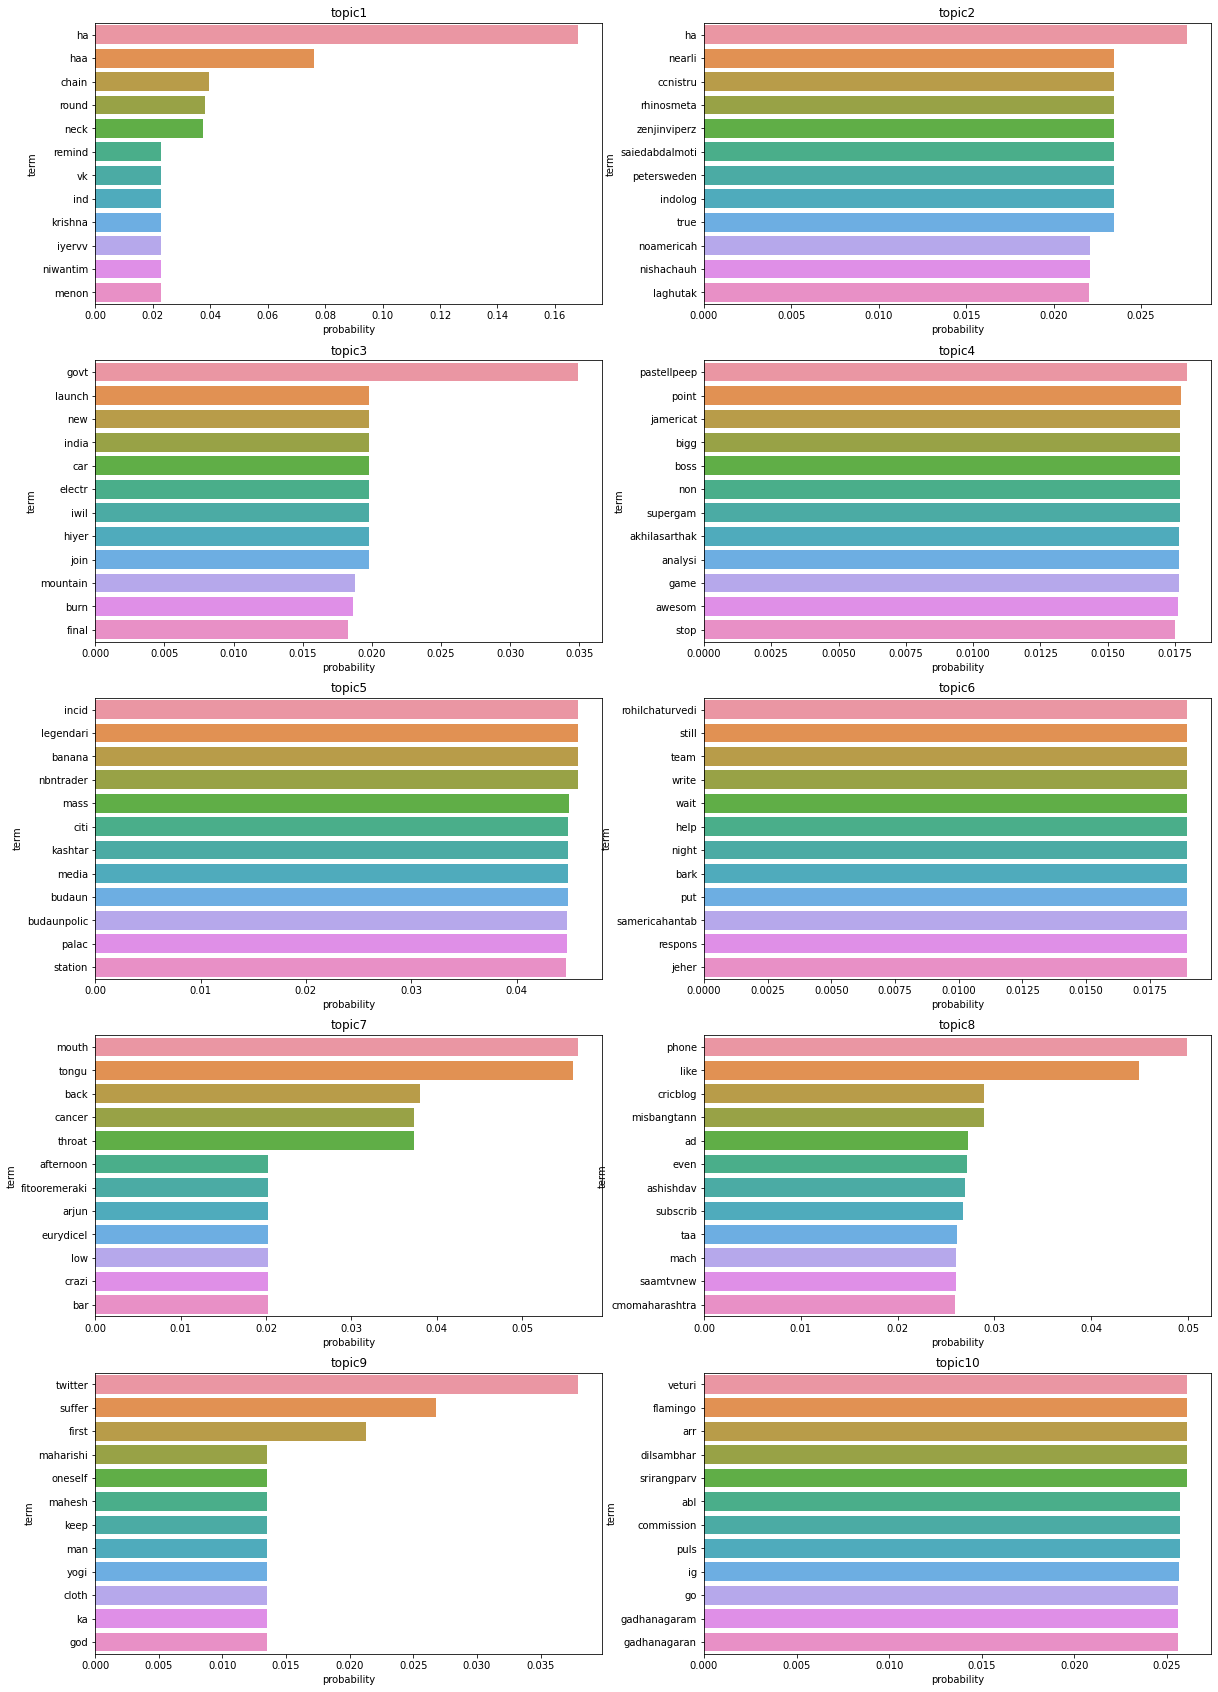

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import seaborn as sns

fig = plt.figure(figsize = (20,30))
    
for i in range(10):
    df = pd.DataFrame(lda_model_tfidf.show_topic(i,12), columns=['term','prob']).set_index('term')
    plt.subplot(5,2,i+1)
    plt.title('topic'+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df)
    plt.xlabel('probability')
plt.show()